In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Train.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,65,2016,November,46,8,0,4,2,...,No Deposit,240.0,NaN,0,Transient,37.8,0,1,Check-Out,11/12/2016
1,Resort Hotel,0,92,2016,November,46,8,0,4,2,...,No Deposit,240.0,NaN,0,Transient-Party,37.8,0,0,Check-Out,11/12/2016
2,Resort Hotel,0,92,2016,November,46,8,0,4,2,...,No Deposit,240.0,NaN,0,Transient-Party,37.8,0,0,Check-Out,11/12/2016
3,Resort Hotel,0,31,2016,November,46,8,0,4,1,...,No Deposit,240.0,NaN,0,Transient,37.8,0,2,Check-Out,11/12/2016
4,Resort Hotel,0,95,2016,November,45,5,2,5,2,...,No Deposit,240.0,NaN,0,Transient,96.0,1,1,Check-Out,11/12/2016


In [4]:
#data shape
df.shape

(89391, 32)

In [5]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89391 entries, 0 to 89390
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           89391 non-null  object 
 1   is_canceled                     89391 non-null  int64  
 2   lead_time                       89391 non-null  int64  
 3   arrival_date_year               89391 non-null  int64  
 4   arrival_date_month              89391 non-null  object 
 5   arrival_date_week_number        89391 non-null  int64  
 6   arrival_date_day_of_month       89391 non-null  int64  
 7   stays_in_weekend_nights         89391 non-null  int64  
 8   stays_in_week_nights            89391 non-null  int64  
 9   adults                          89391 non-null  int64  
 10  children                        89387 non-null  float64
 11  babies                          89391 non-null  int64  
 12  meal                            

In [6]:
#mssing values
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                              27
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             10139
company                           84979


In [7]:
#company has almost 90% missing values so removed that column
df=df.drop('company',axis=1)

In [8]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,65,2016,November,46,8,0,4,2,...,0,No Deposit,240.0,0,Transient,37.8,0,1,Check-Out,11/12/2016
1,Resort Hotel,0,92,2016,November,46,8,0,4,2,...,0,No Deposit,240.0,0,Transient-Party,37.8,0,0,Check-Out,11/12/2016
2,Resort Hotel,0,92,2016,November,46,8,0,4,2,...,0,No Deposit,240.0,0,Transient-Party,37.8,0,0,Check-Out,11/12/2016
3,Resort Hotel,0,31,2016,November,46,8,0,4,1,...,0,No Deposit,240.0,0,Transient,37.8,0,2,Check-Out,11/12/2016
4,Resort Hotel,0,95,2016,November,45,5,2,5,2,...,1,No Deposit,240.0,0,Transient,96.0,1,1,Check-Out,11/12/2016


In [9]:
#mean of missing values
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                              27
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             10139
days_in_waiting_list                  0


In [10]:
#categorical columns
[col for col in df.columns if df[col].dtype=='object']

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [11]:
#numerical columns
[col for col in df.columns if df[col].dtype!='object']

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [12]:
#value counts of each object feature
for i in [col for col in df.columns if df[col].dtype=='object']:
    print("The value counts for {} are".format(i))
    print(df[i].value_counts())
    print()

The value counts for hotel are
City Hotel      79330
Resort Hotel    10061
Name: hotel, dtype: int64

The value counts for arrival_date_month are
August       10037
May           9372
July          9126
June          8874
April         8594
October       7610
March         7513
September     7400
February      6044
December      5064
November      5053
January       4704
Name: arrival_date_month, dtype: int64

The value counts for meal are
BB           69775
SC           10603
HB            8468
Undefined      445
FB             100
Name: meal, dtype: int64

The value counts for country are
PRT    34031
FRA     9419
GBR     7557
DEU     6448
ESP     5619
       ...  
HND        1
ZMB        1
VGB        1
NIC        1
COM        1
Name: country, Length: 171, dtype: int64

The value counts for market_segment are
Online TA        43409
Offline TA/TO    18546
Groups           15139
Direct            8032
Corporate         3413
Complementary      613
Aviation           237
Undefined       

In [17]:
#duplicate values
df[df.duplicated()].sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
29089,City Hotel,1,263,2016,October,43,21,0,2,2,...,0,Non Refund,31.0,0,Transient,110.00,0,0,Canceled,3/9/2016
18080,City Hotel,1,35,2016,March,12,16,0,2,2,...,1,No Deposit,9.0,0,Transient,116.10,0,0,Canceled,3/11/2016
20624,City Hotel,1,302,2016,May,19,5,0,2,2,...,0,Non Refund,1.0,0,Transient,62.00,0,0,Canceled,10/21/2015
62295,City Hotel,0,132,2016,July,27,1,1,2,2,...,0,No Deposit,22.0,0,Transient,72.25,0,0,Check-Out,7/4/2016
13813,City Hotel,0,56,2015,September,39,25,2,2,2,...,0,No Deposit,44.0,0,Transient-Party,185.00,0,0,Check-Out,9/29/2015
32052,City Hotel,1,267,2016,December,53,31,1,1,3,...,0,No Deposit,9.0,0,Transient,121.50,0,0,Canceled,7/19/2016
89278,City Hotel,0,213,2017,August,35,28,1,3,1,...,1,No Deposit,19.0,0,Transient-Party,104.00,0,0,Check-Out,9/1/2017
50707,City Hotel,0,32,2015,November,47,20,0,2,1,...,0,No Deposit,119.0,0,Transient-Party,73.00,0,0,Check-Out,11/22/2015
15923,City Hotel,0,84,2015,November,48,27,1,2,2,...,0,No Deposit,1.0,0,Transient-Party,64.00,0,0,Check-Out,11/30/2015
34701,City Hotel,1,92,2017,March,11,15,0,3,2,...,0,Non Refund,NaN,0,Transient,85.00,0,0,Canceled,12/13/2016


<AxesSubplot:>

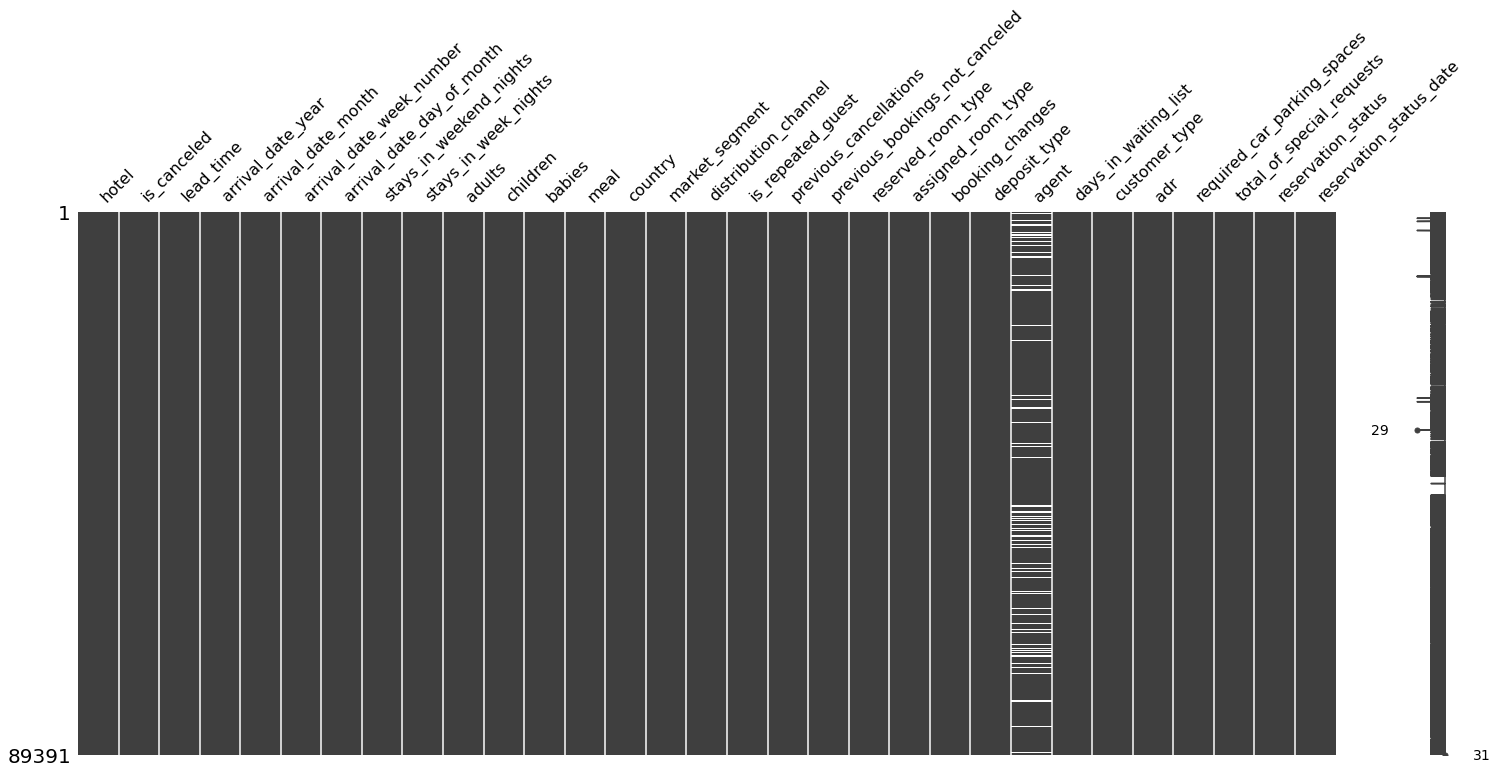

In [14]:
#plot missing values using missingno module.
msno.matrix(df)

In [15]:
#variance
df.var()

is_canceled                           0.233205
lead_time                         11926.375910
arrival_date_year                     0.493012
arrival_date_week_number            185.703049
arrival_date_day_of_month            76.305323
stays_in_weekend_nights               0.862421
stays_in_week_nights                  2.680555
adults                                0.253195
children                              0.143086
babies                                0.008084
is_repeated_guest                     0.025524
previous_cancellations                0.153862
previous_bookings_not_canceled        2.556465
booking_changes                       0.405924
agent                              7463.771722
days_in_waiting_list                391.406165
adr                                2164.593715
required_car_parking_spaces           0.040528
total_of_special_requests             0.632414
dtype: float64

In [16]:
#covariance
df.cov()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,0.233205,16.281969,-0.028440,0.185013,-0.021393,-0.018407,-0.006083,0.012083,-0.005685,-0.001546,-0.004719,0.033610,-0.035452,-0.047077,-7.746280,0.676423,0.113842,-0.015485,-0.110133
lead_time,16.281969,11926.375910,0.528391,195.178113,13.689184,1.592501,17.115898,6.548765,-1.880311,-0.234393,-1.951661,5.250667,-10.936681,-1.358967,-529.480151,397.752808,-498.596088,-2.088551,-10.108154
arrival_date_year,-0.028440,0.528391,0.493012,-5.277511,-0.019809,0.047735,0.125923,0.021705,0.015691,0.000304,-0.002180,-0.055574,0.016107,0.024983,17.349116,-1.078614,6.803628,0.009893,0.081584
arrival_date_week_number,0.185013,195.178113,-5.277511,185.703049,7.867800,-0.114174,-0.342318,0.127319,0.022192,0.003793,-0.017777,0.216129,-0.232125,-0.081798,-108.425048,5.389079,38.735818,-0.053566,0.217422
arrival_date_day_of_month,-0.021393,13.689184,-0.019809,7.867800,76.305323,0.025788,-0.223436,-0.009474,0.049420,0.001389,-0.012648,-0.035937,-0.029940,0.061653,6.011346,3.705052,12.388072,0.013661,0.016850
stays_in_weekend_nights,-0.018407,1.592501,0.047735,-0.114174,0.025788,0.862421,0.528880,0.039261,0.013167,0.001051,-0.012288,-0.015595,-0.043119,0.036096,6.230203,-1.024659,1.514021,-0.002409,0.055637
stays_in_week_nights,-0.006083,17.115898,0.125923,-0.342318,-0.223436,0.528880,2.680555,0.073408,0.021250,0.002209,-0.025181,-0.034301,-0.105010,0.103849,15.584463,0.200256,3.954478,-0.007299,0.092302
adults,0.012083,6.548765,0.021705,0.127319,-0.009474,0.039261,0.073408,0.253195,0.001406,0.000714,-0.013122,-0.007110,-0.085709,-0.024751,-3.413129,-0.073121,6.333246,0.002058,0.062442
children,-0.005685,-1.880311,0.015691,0.022192,0.049420,0.013167,0.021250,0.001406,0.143086,0.000942,-0.001791,-0.006254,-0.010420,0.012795,-0.302153,-0.264748,5.542868,0.004808,0.033540
babies,-0.001546,-0.234393,0.000304,0.003793,0.001389,0.001051,0.002209,0.000714,0.000942,0.008084,-0.000048,-0.000354,-0.000577,0.004732,0.210820,-0.017408,0.078119,0.000651,0.005930


In [17]:
#std deviation
df.std()

is_canceled                         0.482913
lead_time                         109.207948
arrival_date_year                   0.702148
arrival_date_week_number           13.627291
arrival_date_day_of_month           8.735292
stays_in_weekend_nights             0.928666
stays_in_week_nights                1.637240
adults                              0.503185
children                            0.378266
babies                              0.089913
is_repeated_guest                   0.159762
previous_cancellations              0.392253
previous_bookings_not_canceled      1.598895
booking_changes                     0.637122
agent                              86.393123
days_in_waiting_list               19.783988
adr                                46.525194
required_car_parking_spaces         0.201315
total_of_special_requests           0.795245
dtype: float64

In [18]:
#correlation
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.308733,-0.083874,0.028114,-0.005071,-0.041045,-0.007694,0.049724,-0.031120,-0.035615,-0.061166,0.177433,-0.045915,-0.153009,-0.184284,0.070800,0.005067,-0.159277,-0.286780
lead_time,0.308733,1.000000,0.006891,0.131150,0.014350,0.015702,0.095727,0.119173,-0.045517,-0.023871,-0.111860,0.122573,-0.062634,-0.019531,-0.055239,0.184096,-0.098131,-0.094998,-0.116390
arrival_date_year,-0.083874,0.006891,1.000000,-0.551558,-0.003230,0.073206,0.109538,0.061433,0.059082,0.004813,-0.019437,-0.201781,0.014347,0.055847,0.286082,-0.077647,0.208269,0.069985,0.146109
arrival_date_week_number,0.028114,0.131150,-0.551558,1.000000,0.066095,-0.009022,-0.015343,0.018568,0.004305,0.003095,-0.008165,0.040433,-0.010654,-0.009421,-0.093929,0.019989,0.061096,-0.019526,0.020063
arrival_date_day_of_month,-0.005071,0.014350,-0.003230,0.066095,1.000000,0.003179,-0.015623,-0.002155,0.014957,0.001768,-0.009063,-0.010488,-0.002144,0.011078,0.007957,0.021439,0.030482,0.007768,0.002426
stays_in_weekend_nights,-0.041045,0.015702,0.073206,-0.009022,0.003179,1.000000,0.347845,0.084018,0.037483,0.012584,-0.082820,-0.042812,-0.029039,0.061006,0.077337,-0.055771,0.035042,-0.012887,0.075337
stays_in_week_nights,-0.007694,0.095727,0.109538,-0.015343,-0.015623,0.347845,1.000000,0.089105,0.034313,0.015009,-0.096271,-0.053410,-0.040114,0.099556,0.111094,0.006182,0.051914,-0.022144,0.070892
adults,0.049724,0.119173,0.061433,0.018568,-0.002155,0.084018,0.089105,1.000000,0.007389,0.015778,-0.163224,-0.036021,-0.106531,-0.077204,-0.082359,-0.007345,0.270527,0.020313,0.156045
children,-0.031120,-0.045517,0.059082,0.004305,0.014957,0.037483,0.034313,0.007389,1.000000,0.027710,-0.029636,-0.042149,-0.017228,0.053089,-0.009040,-0.035376,0.314969,0.063137,0.111497
babies,-0.035615,-0.023871,0.004813,0.003095,0.001768,0.012584,0.015009,0.015778,0.027710,1.000000,-0.003357,-0.010043,-0.004014,0.082609,0.027213,-0.009786,0.018674,0.035954,0.082930


<AxesSubplot:>

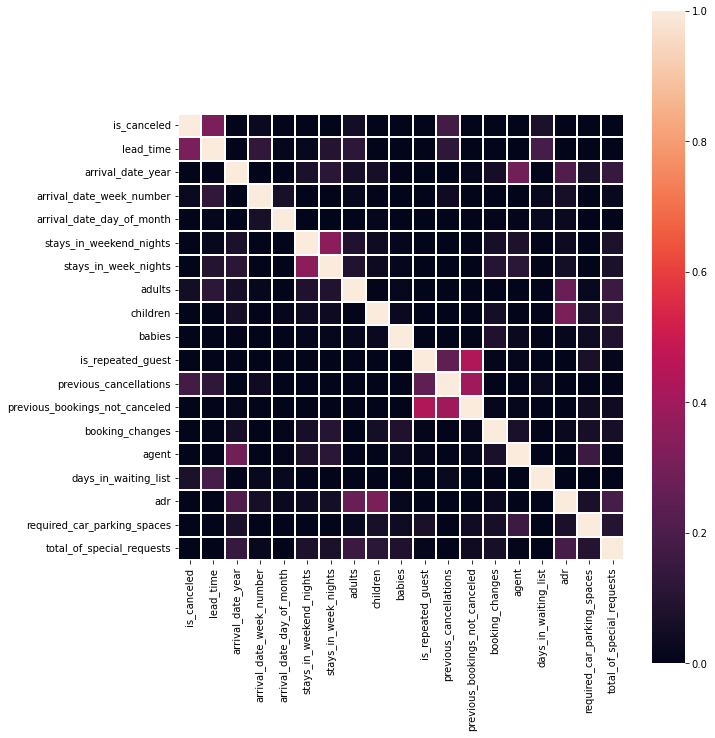

In [19]:
#heatmap
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(),linewidths=2,vmax=1, vmin=0, square=True)

### Handling Missing Values -

In [20]:
#fill missing values with KNN Imputer
knn_imp=KNNImputer(missing_values=np.nan,n_neighbors=5)

In [19]:
df_imput=df.copy()

In [21]:
to_impute=pd.DataFrame(df_imput['agent'])
to_impute

,agent
0,240.0
1,240.0
2,240.0
3,240.0
4,240.0
...,...
89386,394.0
89387,9.0
89388,9.0
89389,89.0


In [23]:
#KNN Imputer fit & transform
to_impute=knn_imp.fit_transform(to_impute)

In [24]:
df_imput['agent']=to_impute

In [25]:
df_imput.isnull().sum()

hotel                              0
is_canceled                        0
lead_time                          0
arrival_date_year                  0
arrival_date_month                 0
arrival_date_week_number           0
arrival_date_day_of_month          0
stays_in_weekend_nights            0
stays_in_week_nights               0
adults                             0
children                           4
babies                             0
meal                               0
country                           27
market_segment                     0
distribution_channel               0
is_repeated_guest                  0
previous_cancellations             0
previous_bookings_not_canceled     0
reserved_room_type                 0
assigned_room_type                 0
booking_changes                    0
deposit_type                       0
agent                              0
days_in_waiting_list               0
customer_type                      0
adr                                0
r

In [26]:
#drop remaining missing values
df_imput=df_imput.dropna()

In [27]:
df_imput.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

#### Handling Duplicate Values - 

In [28]:
#we do not remove the duplicate values becuase there are chances of customers having the same booking details.
df_imput.duplicated().sum()

26910

In [29]:
df_imput.shape

(89360, 31)

#### Handling Outliers - 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'is_canceled'),
  Text(1, 0, 'lead_time'),
  Text(2, 0, 'arrival_date_year'),
  Text(3, 0, 'arrival_date_week_number'),
  Text(4, 0, 'arrival_date_day_of_month'),
  Text(5, 0, 'stays_in_weekend_nights'),
  Text(6, 0, 'stays_in_week_nights'),
  Text(7, 0, 'adults'),
  Text(8, 0, 'children'),
  Text(9, 0, 'babies'),
  Text(10, 0, 'is_repeated_guest'),
  Text(11, 0, 'previous_cancellations'),
  Text(12, 0, 'previous_bookings_not_canceled'),
  Text(13, 0, 'booking_changes'),
  Text(14, 0, 'agent'),
  Text(15, 0, 'days_in_waiting_list'),
  Text(16, 0, 'adr'),
  Text(17, 0, 'required_car_parking_spaces'),
  Text(18, 0, 'total_of_special_requests')])

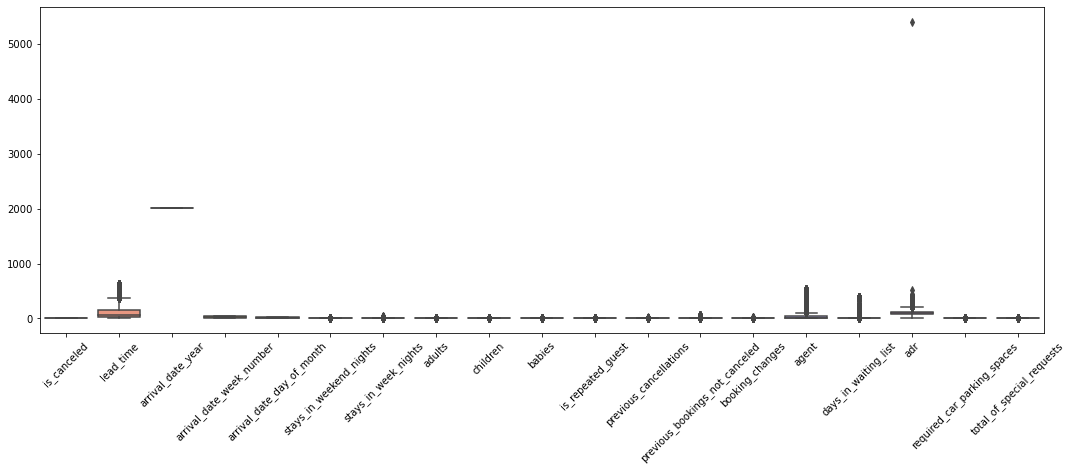

In [30]:
#plot outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
sns.boxplot(data=df_imput)
plt.xticks(rotation=45)

In [31]:
#defined function to identify the outliers
def remove_outliers(data):
    sorted(data)
    Q1,Q3=np.percentile(data,[25,75])
    IQR=Q3-Q1
    ur=Q3+(1.5*IQR)
    lr=Q1-(1.5*IQR)
    return ur,lr    

In [32]:
#replaced outliers with ur & lr.
for col in df_imput.columns:
    if df_imput[col].dtype !='object':
        ur,lr=remove_outliers(df_imput[col])
        df_imput[col]=np.where(df_imput[col] > ur,ur,df_imput[col])
        df_imput[col]=np.where(df_imput[col] < lr,lr,df_imput[col])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'is_canceled'),
  Text(1, 0, 'lead_time'),
  Text(2, 0, 'arrival_date_year'),
  Text(3, 0, 'arrival_date_week_number'),
  Text(4, 0, 'arrival_date_day_of_month'),
  Text(5, 0, 'stays_in_weekend_nights'),
  Text(6, 0, 'stays_in_week_nights'),
  Text(7, 0, 'adults'),
  Text(8, 0, 'children'),
  Text(9, 0, 'babies'),
  Text(10, 0, 'is_repeated_guest'),
  Text(11, 0, 'previous_cancellations'),
  Text(12, 0, 'previous_bookings_not_canceled'),
  Text(13, 0, 'booking_changes'),
  Text(14, 0, 'agent'),
  Text(15, 0, 'days_in_waiting_list'),
  Text(16, 0, 'adr'),
  Text(17, 0, 'required_car_parking_spaces'),
  Text(18, 0, 'total_of_special_requests')])

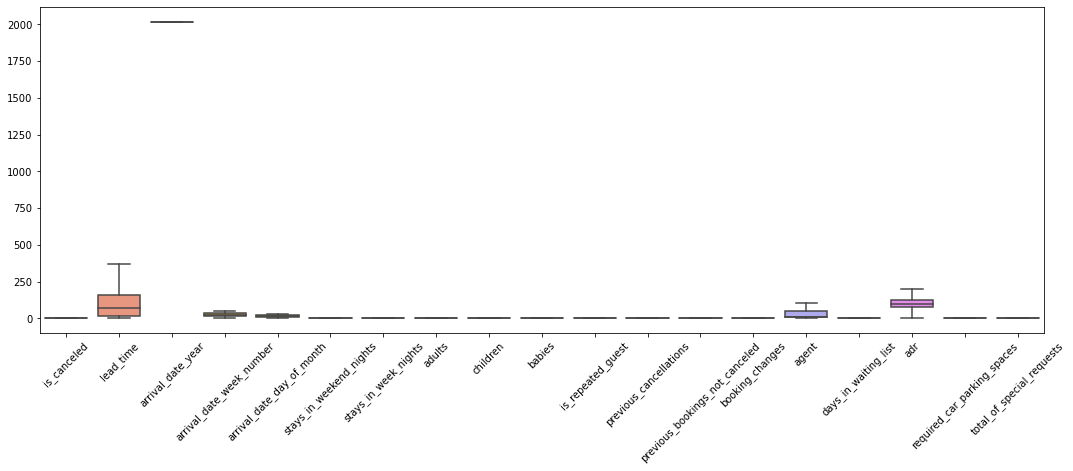

In [33]:
#plot to check outlier removal
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
sns.boxplot(data=df_imput)
plt.xticks(rotation=45)

In [34]:
df_imput.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,65.0,2016.0,November,46.0,8.0,0.0,4.0,2.0,...,0.0,No Deposit,107.428305,0.0,Transient,37.8,0.0,1.0,Check-Out,11/12/2016
1,Resort Hotel,0.0,92.0,2016.0,November,46.0,8.0,0.0,4.0,2.0,...,0.0,No Deposit,107.428305,0.0,Transient-Party,37.8,0.0,0.0,Check-Out,11/12/2016
2,Resort Hotel,0.0,92.0,2016.0,November,46.0,8.0,0.0,4.0,2.0,...,0.0,No Deposit,107.428305,0.0,Transient-Party,37.8,0.0,0.0,Check-Out,11/12/2016
3,Resort Hotel,0.0,31.0,2016.0,November,46.0,8.0,0.0,4.0,2.0,...,0.0,No Deposit,107.428305,0.0,Transient,37.8,0.0,2.0,Check-Out,11/12/2016
4,Resort Hotel,0.0,95.0,2016.0,November,45.0,5.0,2.0,5.0,2.0,...,0.0,No Deposit,107.428305,0.0,Transient,96.0,0.0,1.0,Check-Out,11/12/2016


In [35]:
#removed 'reservation_status_date'
df_imput.drop('reservation_status_date',axis=1,inplace=True)

In [36]:
#to display all columns
pd.set_option("display.max_columns",None)
df_imput.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
19148,City Hotel,0.0,91.0,2016.0,April,15.0,6.0,0.0,4.0,2.0,0.0,0.0,BB,DEU,Direct,Direct,0.0,0.0,0.0,A,D,0.0,No Deposit,14.000000,0.0,Transient,76.5,0.0,0.0,Check-Out
39623,City Hotel,1.0,129.0,2017.0,June,22.0,2.0,1.0,2.0,2.0,0.0,0.0,BB,PRT,Groups,TA/TO,0.0,0.0,0.0,A,A,0.0,Non Refund,107.428305,0.0,Transient,130.0,0.0,0.0,Canceled
72715,City Hotel,0.0,10.0,2016.0,December,49.0,2.0,1.0,2.0,2.0,0.0,0.0,BB,BEL,Online TA,TA/TO,0.0,0.0,0.0,A,D,0.0,No Deposit,9.000000,0.0,Transient,99.2,0.0,1.0,Check-Out
64587,City Hotel,0.0,109.0,2016.0,August,32.0,6.0,0.0,1.0,2.0,0.0,0.0,BB,NLD,Online TA,TA/TO,0.0,0.0,0.0,D,E,0.0,No Deposit,9.000000,0.0,Transient,146.7,0.0,2.5,Check-Out
81520,City Hotel,0.0,102.0,2017.0,May,19.0,8.0,1.0,3.0,2.0,0.0,0.0,BB,DEU,Offline TA/TO,TA/TO,0.0,0.0,0.0,A,A,0.0,No Deposit,107.428305,0.0,Transient,99.1,0.0,0.0,Check-Out


In [37]:
#change the data type of target variable.
df_imput['is_canceled']=df_imput['is_canceled'].astype('int')

In [38]:
#we delete the below features as it having only single values.
print(df_imput['is_repeated_guest'].value_counts())
print()
print(df_imput['previous_cancellations'].value_counts())
print()
print(df_imput['previous_bookings_not_canceled'].value_counts())
print()
print(df_imput['booking_changes'].value_counts())
print()
print(df_imput['days_in_waiting_list'].value_counts())
print()
print(df_imput['required_car_parking_spaces'].value_counts())

0.0    89360
Name: is_repeated_guest, dtype: int64

0.0    89360
Name: previous_cancellations, dtype: int64

0.0    89360
Name: previous_bookings_not_canceled, dtype: int64

0.0    89360
Name: booking_changes, dtype: int64

0.0    89360
Name: days_in_waiting_list, dtype: int64

0.0    89360
Name: required_car_parking_spaces, dtype: int64


In [39]:
df_imput.drop(['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes',
               'days_in_waiting_list','required_car_parking_spaces'],axis=1,inplace=True)

In [40]:
df_imput.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,adr,total_of_special_requests,reservation_status
12603,City Hotel,0,0.0,2015.0,September,37.0,8.0,0.0,1.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,A,A,No Deposit,48.371322,Transient,124.00,0.0,Check-Out
18767,City Hotel,1,112.0,2016.0,March,14.0,30.0,0.0,2.0,2.0,0.0,0.0,BB,PRT,Groups,TA/TO,A,A,Non Refund,1.000000,Transient,64.00,0.0,Canceled
56213,City Hotel,0,2.0,2016.0,March,14.0,27.0,2.0,1.0,2.0,0.0,0.0,BB,PRT,Offline TA/TO,TA/TO,A,D,No Deposit,83.000000,Transient,100.47,1.0,Check-Out
7214,Resort Hotel,0,277.0,2017.0,May,22.0,28.0,4.0,6.0,2.0,0.0,0.0,BB,GBR,Offline TA/TO,TA/TO,A,A,No Deposit,107.428305,Contract,58.70,0.0,Check-Out
77212,City Hotel,0,23.0,2017.0,March,10.0,9.0,0.0,1.0,2.0,0.0,0.0,SC,USA,Online TA,TA/TO,A,A,No Deposit,9.000000,Transient,88.00,0.0,Check-Out


In [41]:
#categorical columns
cat_col=[col for col in df_imput.columns if df_imput[col].dtype == 'object']
cat_col

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [42]:
#numerical columns
num_col=[col for col in df_imput.columns if df_imput[col].dtype != 'object']
num_col

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'agent',
 'adr',
 'total_of_special_requests']

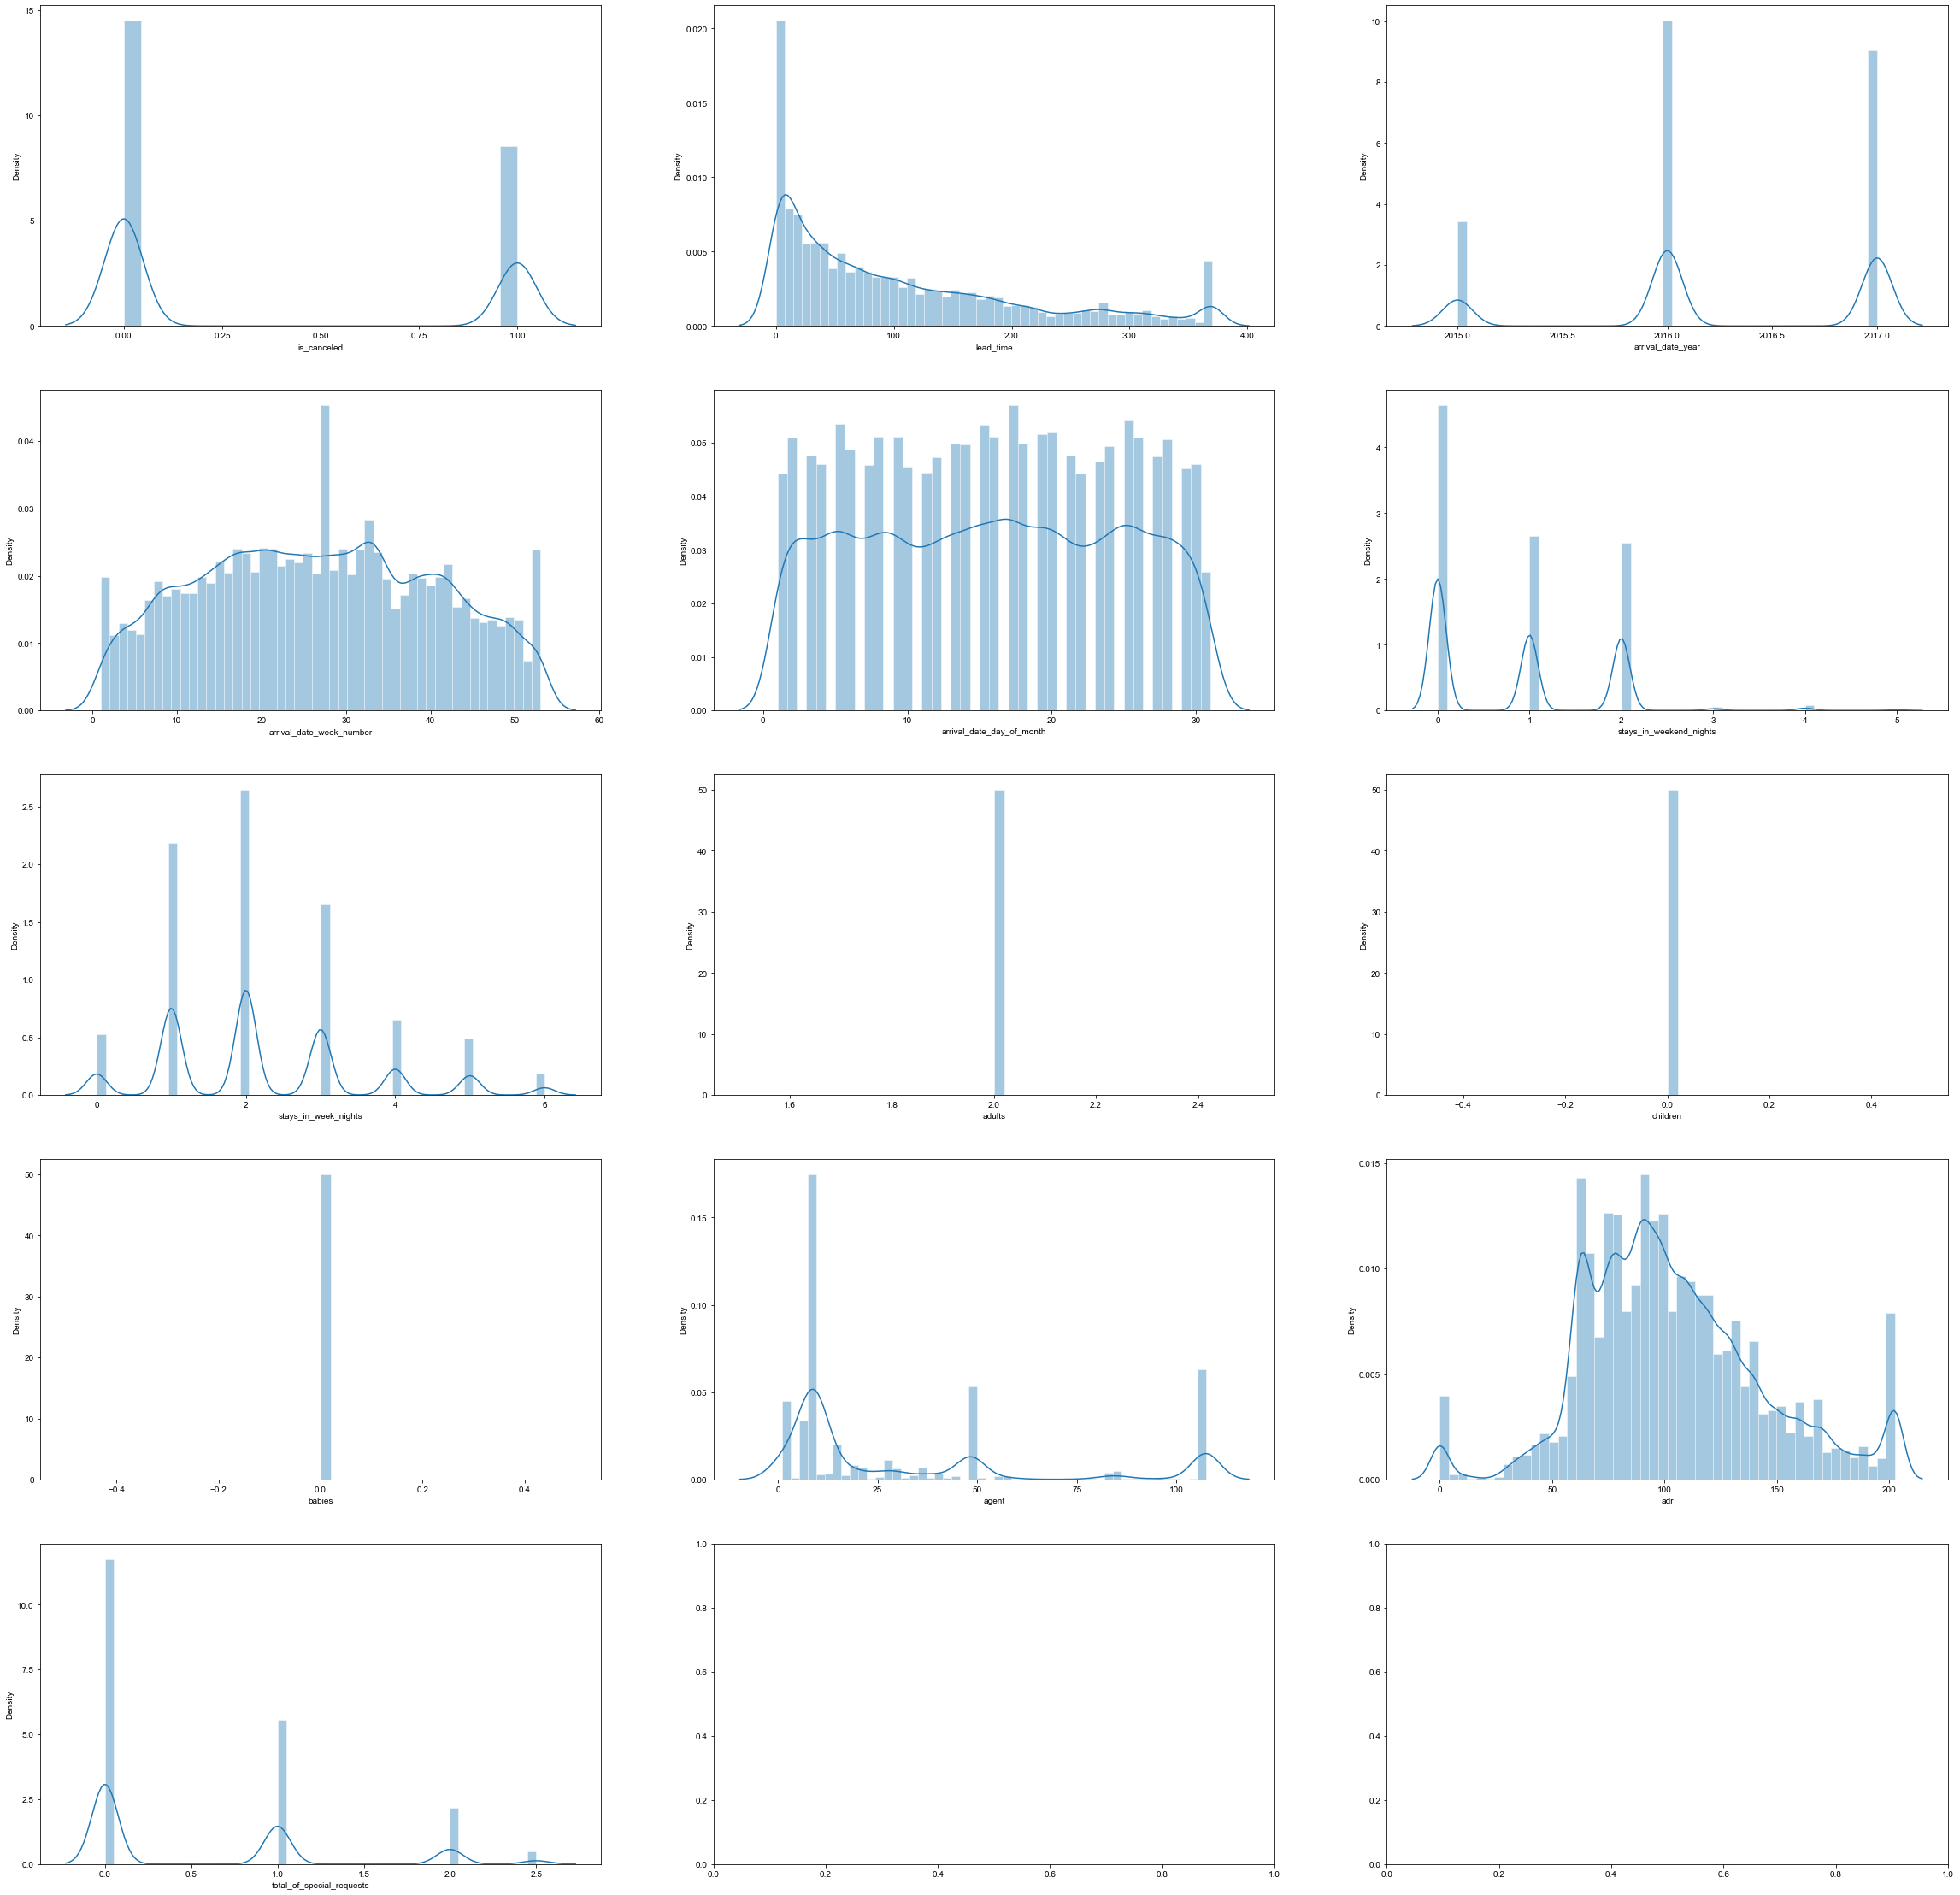

In [43]:
#check for the distribution of data
fig,ax=plt.subplots(5,3,figsize=(40,40))
sns.set(font_scale=2.5,style="white", palette=None)
for i,subplot in zip(num_col,ax.flatten()):
    sns.distplot(df_imput[i],ax=subplot)

### Label Encoder on categorical columns - 

In [44]:
le=LabelEncoder()

In [45]:
for i in cat_col:
    df_imput[i]=le.fit_transform(df_imput[i])

In [46]:
df_imput.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,adr,total_of_special_requests,reservation_status
0,1,0,65.0,2016.0,9,46.0,8.0,0.0,4.0,2.0,0.0,0.0,0,40,6,3,0,0,0,107.428305,2,37.8,1.0,1
1,1,0,92.0,2016.0,9,46.0,8.0,0.0,4.0,2.0,0.0,0.0,0,12,6,3,0,0,0,107.428305,3,37.8,0.0,1
2,1,0,92.0,2016.0,9,46.0,8.0,0.0,4.0,2.0,0.0,0.0,0,12,6,3,0,0,0,107.428305,3,37.8,0.0,1
3,1,0,31.0,2016.0,9,46.0,8.0,0.0,4.0,2.0,0.0,0.0,0,27,6,3,0,0,0,107.428305,2,37.8,2.0,1
4,1,0,95.0,2016.0,9,45.0,5.0,2.0,5.0,2.0,0.0,0.0,0,119,6,3,6,6,0,107.428305,2,96.0,1.0,1


#### Split the data into train & test -

In [47]:
x=df_imput.drop('is_canceled',axis=1)
y=df_imput['is_canceled']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(67020, 23)
(22340, 23)
(67020,)
(22340,)


### Min-Max Scaler - 

In [49]:
min_max_sc=MinMaxScaler()

In [50]:
df_imput_sc=min_max_sc.fit_transform(x_train)
df_imput_sc

array([[0.        , 0.23513514, 1.        , ..., 0.4691358 , 0.        ,
        0.        ],
       [0.        , 0.00810811, 0.        , ..., 0.32098765, 0.        ,
        0.5       ],
       [0.        , 0.09459459, 1.        , ..., 0.63703704, 0.        ,
        0.5       ],
       ...,
       [0.        , 0.2       , 1.        , ..., 0.48      , 0.        ,
        0.        ],
       [0.        , 0.03243243, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.5       , ..., 0.31012346, 0.        ,
        0.        ]])

In [51]:
x_train[x_train.columns]=df_imput_sc
x_train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,adr,total_of_special_requests,reservation_status
36207,0.0,0.235135,1.0,0.000000,0.269231,0.466667,0.4,0.333333,0.0,0.0,0.0,0.00,0.763314,0.666667,1.000000,0.0,0.0,0.5,0.000000,0.666667,0.469136,0.0,0.0
48944,0.0,0.008108,0.0,0.909091,0.807692,0.566667,0.4,0.000000,0.0,0.0,0.0,0.00,0.763314,0.333333,0.000000,0.0,0.0,0.0,0.445101,0.666667,0.320988,0.0,0.5
79900,0.0,0.094595,1.0,0.000000,0.288462,0.533333,0.2,0.166667,0.0,0.0,0.0,0.00,0.165680,1.000000,1.000000,0.0,0.0,0.0,0.075168,0.666667,0.637037,0.0,0.5
28842,0.0,0.027027,0.5,0.909091,0.807692,0.500000,0.4,0.166667,0.0,0.0,0.0,0.75,0.763314,1.000000,1.000000,0.0,0.0,0.0,0.056376,0.666667,0.532346,1.0,0.0
73162,0.0,0.000000,1.0,0.363636,0.038462,0.533333,0.0,0.166667,0.0,0.0,0.0,0.00,0.763314,0.500000,0.333333,0.0,0.0,0.0,0.445101,0.666667,0.439506,0.0,0.5


### PCA - 

In [52]:
pca=PCA()

In [53]:
x_train_pca=pca.fit_transform(x_train)
x_train_pca.shape

(67020, 23)

In [54]:
#components
pca.components_

array([[ 4.57470750e-01, -1.60015421e-01,  5.40718172e-01,
        -2.59760856e-01, -2.62315685e-01, -4.22078558e-03,
         5.49945829e-02,  8.65501111e-02,  0.00000000e+00,
         8.47032947e-22,  0.00000000e+00,  1.68479290e-02,
        -1.31156293e-01,  3.49805201e-03, -1.16432800e-01,
         1.27701932e-01,  1.18789766e-01, -1.23881842e-01,
         4.20894812e-01, -5.48286699e-03,  5.18214532e-02,
         1.65480026e-01,  2.04571028e-01],
       [ 2.45243524e-01, -1.60352797e-02, -2.26079452e-01,
         1.91602494e-01,  1.03562162e-01,  2.68149073e-03,
        -6.22946336e-02, -9.14607200e-02, -0.00000000e+00,
        -2.16840434e-19, -0.00000000e+00, -2.20114028e-01,
         3.14738390e-01, -3.66372523e-01, -3.71945857e-01,
        -6.95955555e-02, -2.96055376e-02,  1.20675235e-01,
         4.71413725e-01,  8.54020949e-02, -1.82854845e-01,
        -3.53720617e-01, -1.87866565e-02],
       [ 1.12076954e-01, -3.70591767e-01, -3.88093403e-01,
         3.15890349e-01,  3.2

In [55]:
#variance ratio
pca.explained_variance_ratio_

array([1.76344559e-01, 1.22082104e-01, 9.89969528e-02, 8.19699757e-02,
       6.45485210e-02, 6.29290362e-02, 5.89569539e-02, 4.85261922e-02,
       4.74611654e-02, 4.31615747e-02, 3.42408284e-02, 3.23654880e-02,
       2.93016361e-02, 2.26591286e-02, 2.12946656e-02, 2.03688273e-02,
       1.42494203e-02, 1.10147876e-02, 5.34335032e-03, 4.18483288e-03,
       1.40731351e-33, 4.96819880e-34, 4.21358455e-34])

In [56]:
#cumulative sum of variance ratio to check the no of components to select
ratio=pca.explained_variance_ratio_.cumsum()
ratio

array([0.17634456, 0.29842666, 0.39742362, 0.47939359, 0.54394211,
       0.60687115, 0.6658281 , 0.71435429, 0.76181546, 0.80497703,
       0.83921786, 0.87158335, 0.90088499, 0.92354412, 0.94483878,
       0.96520761, 0.97945703, 0.99047182, 0.99581517, 1.        ,
       1.        , 1.        , 1.        ])

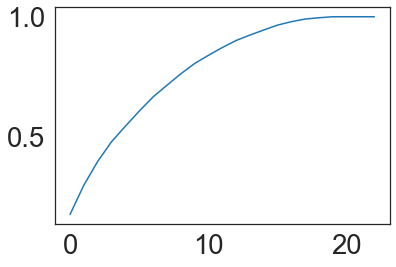

In [57]:
#plot no of components vs variance ratio
plt.plot(range(len(ratio)),ratio)

(67020, 13)
[0.17634456 0.29842666 0.39742362 0.47939359 0.54394211 0.60687115
 0.6658281  0.71435429 0.76181546 0.80497703 0.83921786 0.87158335
 0.90088499]


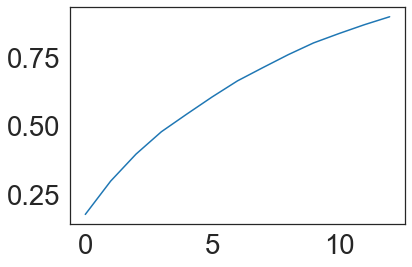

In [58]:
#selected n_components = 13 which explains 90% of our data
pca1=PCA(n_components=13)
x_train_pca=pca1.fit_transform(x_train)
print(x_train_pca.shape)

ratio1=pca1.explained_variance_ratio_.cumsum()
print(ratio1)

plt.plot(range(len(ratio1)),ratio1)

In [59]:
x_train_pca=pd.DataFrame(x_train_pca)
x_train_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.004579,-0.094338,-0.799963,-0.303829,0.105402,-0.082389,0.204767,0.035088,-0.126460,0.069598,0.189289,-0.056795,-0.088822
1,-0.447320,1.057340,0.612580,-0.531688,0.034804,0.020285,-0.162104,0.098434,0.156463,0.069460,0.041007,-0.095063,-0.108563
2,0.280432,-0.437431,-0.268197,-0.399070,0.112222,0.090309,0.059948,-0.336355,-0.058067,-0.257830,-0.139410,0.017035,-0.220685
3,-0.356212,-0.418930,0.462403,0.178783,-0.180185,0.217565,-0.317505,0.705941,-0.310894,0.382434,0.081539,-0.191286,-0.055469
4,0.398646,0.450087,-0.251614,-0.764817,0.004326,-0.089571,-0.272546,0.077498,-0.096063,-0.116964,0.075142,-0.024130,0.045247
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67015,0.196957,-0.256965,-0.158095,-0.382776,-0.163132,-0.250127,0.297968,-0.187182,-0.444106,0.344301,-0.323207,0.234878,0.187937
67016,-0.125052,0.216194,-0.529174,-0.104384,0.070408,0.051361,0.180051,-0.049783,-0.373775,-0.081771,0.259961,-0.207804,0.031432
67017,0.007309,-0.255865,-0.381221,-0.071739,-0.064491,-0.187907,-0.315317,-0.271462,-0.116242,-0.148553,0.160127,-0.085839,-0.220741
67018,-0.088667,0.783973,-0.198065,-0.691444,0.182008,0.170299,0.235202,0.185139,0.082665,0.061771,0.024283,-0.212635,-0.225470


### KMeans Clustering - 

In [60]:
kmeans=KMeans()

In [61]:
x_train_cl=x_train_pca.copy()

In [62]:
#to select no of clusters
inert=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x_train_cl)
    kmi=kmeans.inertia_
    inert.append(kmi)
inert

[80521.56391216551,
 69729.37708168961,
 61738.00889480331,
 56377.0462739062,
 52213.177179583305,
 49180.77736421426,
 46611.65781510623,
 45091.95587540312,
 43808.05466463125]

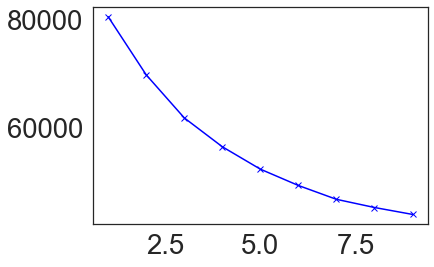

In [63]:
#elbow plot
plt.plot(range(1,10),inert,'bx-')

From the above graph we can select the number of clusters to be 4

In [64]:
#selected clusters = 4
kmeans=KMeans(n_clusters=4)
kmeans.fit(x_train_cl)
kmi=kmeans.inertia_
print("inertia - ",kmi)
print("The created clusters are as -",set(kmeans.labels_))

inertia -  56377.01393752558
The created clusters are as - {0, 1, 2, 3}


In [65]:
x_train_cl['clusters']=kmeans.labels_

In [66]:
x_train_cl.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,clusters
0,0.004579,-0.094338,-0.799963,-0.303829,0.105402,-0.082389,0.204767,0.035088,-0.126460,0.069598,0.189289,-0.056795,-0.088822,3
1,-0.447320,1.057340,0.612580,-0.531688,0.034804,0.020285,-0.162104,0.098434,0.156463,0.069460,0.041007,-0.095063,-0.108563,2
2,0.280432,-0.437431,-0.268197,-0.399070,0.112222,0.090309,0.059948,-0.336355,-0.058067,-0.257830,-0.139410,0.017035,-0.220685,3
3,-0.356212,-0.418930,0.462403,0.178783,-0.180185,0.217565,-0.317505,0.705941,-0.310894,0.382434,0.081539,-0.191286,-0.055469,3
4,0.398646,0.450087,-0.251614,-0.764817,0.004326,-0.089571,-0.272546,0.077498,-0.096063,-0.116964,0.075142,-0.024130,0.045247,2


### Handling the imbalance data - 

In [67]:
smote=SMOTE()

In [68]:
x_train_cl,y_train=smote.fit_resample(x_train_cl,y_train)

In [69]:
y_train.value_counts()

1    42207
0    42207
Name: is_canceled, dtype: int64

In [70]:
x_train_cl.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,clusters
9873,0.098228,-0.596326,0.580853,-0.028124,0.139703,-0.554868,0.280065,0.006855,-0.164172,0.263208,-0.274723,0.257913,0.113640,3
37470,-0.046355,0.555417,-0.333892,0.407044,-0.184415,-0.009381,-0.027208,-0.046510,-0.149654,-0.238383,-0.162024,-0.253117,0.332000,0
34934,-0.486546,0.220578,-0.646836,0.365790,-0.247154,-0.073532,0.608200,0.224940,0.286743,0.102219,-0.265002,-0.056672,-0.037651,0
51705,0.097217,-0.490125,-0.270891,0.121835,-0.554738,0.332529,-0.136144,-0.177071,0.489379,0.191089,0.128432,-0.125613,0.258722,3
46519,0.482951,-0.239787,0.036923,-0.591587,0.494165,-0.170903,0.037776,0.473474,0.496566,-0.171775,0.132514,-0.244398,-0.028568,2


### Transforming all the Preprocessing on Test Data - 

In [71]:
x_test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,adr,total_of_special_requests,reservation_status
53842,0,76.0,2016.0,3,7.0,7.0,2.0,5.0,2.0,0.0,0.0,0,40,5,3,0,0,0,27.000000,2,41.0,0.0,1
9439,1,320.0,2017.0,1,33.0,14.0,1.0,3.0,2.0,0.0,0.0,0,130,6,3,6,6,0,107.428305,2,202.5,2.0,1
38174,0,68.0,2017.0,8,20.0,14.0,2.0,1.0,2.0,0.0,0.0,0,130,4,0,0,0,0,48.371322,3,110.0,0.0,2
75340,0,14.0,2017.0,3,5.0,3.0,0.0,2.0,2.0,0.0,0.0,3,48,6,3,0,0,0,9.000000,2,88.0,1.0,1
54882,0,30.0,2016.0,7,10.0,2.0,0.0,4.0,2.0,0.0,0.0,0,18,6,3,3,3,0,9.000000,2,117.3,1.0,1


In [72]:
#min-max-scaler
to_scale=min_max_sc.transform(x_test)
x_test[x_test.columns]=to_scale

In [73]:
#PCA
x_test_pca=pca1.transform(x_test)
x_test=pd.DataFrame(x_test_pca)
print(x_test.shape)

(22340, 13)


In [74]:
#clustering
kmeans=KMeans(n_clusters=4)
kmeans.fit(x_test)
kmi=kmeans.inertia_
print("inertia - ",kmi)
print("The created clusters are as -",set(kmeans.labels_))

inertia -  18887.10931297894
The created clusters are as - {0, 1, 2, 3}


In [75]:
x_test['cluster']=kmeans.labels_
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster
0,0.076550,-0.125424,-0.144835,-0.131856,-0.262127,0.140043,0.297234,-0.407324,0.241278,-0.410334,0.420498,-0.177450,0.164099,3
1,1.163665,0.020751,0.099374,0.811284,0.211376,-0.417553,0.613534,0.386582,-0.002232,0.441340,-0.392853,0.389370,0.202116,2
2,0.356668,0.588515,0.161659,-0.637994,-0.146091,-0.176719,-0.467355,0.083158,0.289455,-0.175631,-0.118699,0.125073,0.339095,0
3,0.333146,-0.644376,-0.146479,-0.366056,-0.553546,0.412964,-0.185378,0.088466,-0.043710,0.005117,0.046169,0.007485,-0.014230,3
4,0.066846,-0.435197,0.321784,-0.105564,-0.449732,-0.310579,0.163131,-0.329364,0.006092,-0.144941,0.173840,0.027217,0.088352,3


## Classification Models - 

In [76]:
print(x_train_cl.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(84414, 14)
(22340, 14)
(84414,)
(22340,)


### Logistic Regression - 

In [77]:
lreg=LogisticRegression()

In [78]:
lreg.fit(x_train_cl,y_train)
y_pred_lreg=lreg.predict(x_test)

In [79]:
result=accuracy_score(y_test,y_pred_lreg)
result

0.9806177260519248

0.974238733690189


Text(0, 0.5, 'Test TPR')

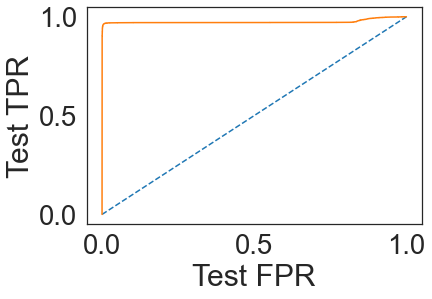

In [80]:
#roc auc curve-

#probability of output on test data
prob=lreg.predict_proba(x_test)
prob=prob[:,1]

#auc_score
auc_score=roc_auc_score(y_test,prob)
print(auc_score)

#plot roc curve
test_fpr,test_tpr,test_threshold=roc_curve(y_test,prob)

plt.plot([0,1],[0,1],linestyle="--")
plt.plot(test_fpr,test_tpr)
plt.xlabel('Test FPR')
plt.ylabel('Test TPR')


In [22]:
#changing threshold value
THRESHOLD=0.9
probs=np.where(lreg.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)
auc_score=roc_auc_score(y_test,probs)
print(auc_score)

#plot roc curve 
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs)

plt.plot([0,1],[0,1],linestyle="--")
plt.plot(test_fpr,test_tpr)
plt.xlabel('Test FPR')
plt.ylabel('Test TPR')

NameError: name 'lreg' is not defined

### Support Vector Machine

In [82]:
svm=SVC()

In [83]:
svm.fit(x_train_cl,y_train)
y_pred_svm=svm.predict(x_test)

In [84]:
#accuracy 
result_svm=accuracy_score(y_test,y_pred_svm)
result_svm

0.9864816472694719

### Testing the Above models on New Data -

In [85]:
df_test=pd.read_csv("Test.csv")
df_test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [86]:
df_test.drop("company",axis=1,inplace=True)

In [87]:
#imputing missing values
df_test['agent']=knn_imp.transform(pd.DataFrame(df_test['agent']))

In [88]:
df_test.isnull().sum()

hotel                               0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           461
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [89]:
#drop remaining missing values
df_test=df_test.dropna()

In [90]:
df_test.isnull().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [91]:
#keeping duplicate values
df_test.duplicated().sum()

5049

In [92]:
#replaced outliers with ur & lr.
for col in df_test.columns:
    if df_test[col].dtype !='object':
        ur,lr=remove_outliers(df_test[col])
        df_test[col]=np.where(df_test[col] > ur,ur,df_test[col])
        df_test[col]=np.where(df_test[col] < lr,lr,df_test[col])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'lead_time'),
  Text(1, 0, 'arrival_date_year'),
  Text(2, 0, 'arrival_date_week_number'),
  Text(3, 0, 'arrival_date_day_of_month'),
  Text(4, 0, 'stays_in_weekend_nights'),
  Text(5, 0, 'stays_in_week_nights'),
  Text(6, 0, 'adults'),
  Text(7, 0, 'children'),
  Text(8, 0, 'babies'),
  Text(9, 0, 'is_repeated_guest'),
  Text(10, 0, 'previous_cancellations'),
  Text(11, 0, 'previous_bookings_not_canceled'),
  Text(12, 0, 'booking_changes'),
  Text(13, 0, 'agent'),
  Text(14, 0, 'days_in_waiting_list'),
  Text(15, 0, 'adr'),
  Text(16, 0, 'required_car_parking_spaces'),
  Text(17, 0, 'total_of_special_requests')])

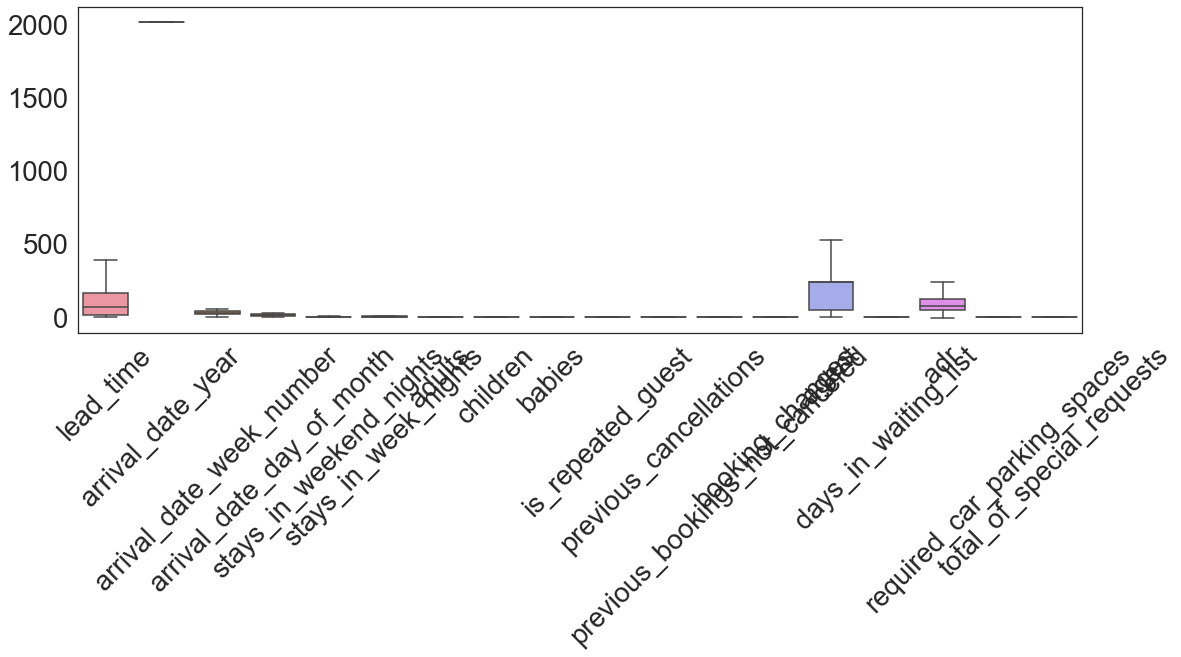

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
sns.boxplot(data=df_test)
plt.xticks(rotation=45)

In [94]:
#drop columns
df_test.drop('reservation_status_date',axis=1,inplace=True)

In [95]:
df_test.drop(['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes',
               'days_in_waiting_list','required_car_parking_spaces'],axis=1,inplace=True)

In [96]:
#categorical columns
cat_col=[col for col in df_test.columns if df_test[col].dtype == 'object']
cat_col

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [97]:
df_test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,adr,total_of_special_requests,reservation_status
0,Resort Hotel,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,C,C,No Deposit,48.371322,Transient,0.0,0.0,Check-Out
1,Resort Hotel,388.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,C,C,No Deposit,48.371322,Transient,0.0,0.0,Check-Out
2,Resort Hotel,7.0,2015.0,July,27.0,1.0,0.0,1.0,2.0,0.0,0.0,BB,GBR,Direct,Direct,A,C,No Deposit,48.371322,Transient,75.0,0.0,Check-Out
3,Resort Hotel,13.0,2015.0,July,27.0,1.0,0.0,1.0,2.0,0.0,0.0,BB,GBR,Corporate,Corporate,A,A,No Deposit,304.000000,Transient,75.0,0.0,Check-Out
4,Resort Hotel,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,0.0,0.0,BB,GBR,Online TA,TA/TO,A,A,No Deposit,240.000000,Transient,98.0,1.0,Check-Out


In [98]:
#label encoding
for i in cat_col:
    df_test[i]=le.fit_transform(df_test[i])

In [99]:
df_test

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,adr,total_of_special_requests,reservation_status
0,0,342.0,2015.0,5,27.0,1.0,0.0,0.0,2.0,0.0,0.0,0,87,2,1,2,2,0,48.371322,2,0.00,0.0,1
1,0,388.0,2015.0,5,27.0,1.0,0.0,0.0,2.0,0.0,0.0,0,87,2,1,2,2,0,48.371322,2,0.00,0.0,1
2,0,7.0,2015.0,5,27.0,1.0,0.0,1.0,2.0,0.0,0.0,0,42,2,1,0,2,0,48.371322,2,75.00,0.0,1
3,0,13.0,2015.0,5,27.0,1.0,0.0,1.0,2.0,0.0,0.0,0,42,1,0,0,0,0,304.000000,2,75.00,0.0,1
4,0,14.0,2015.0,5,27.0,1.0,0.0,2.0,2.0,0.0,0.0,0,42,5,2,0,0,0,240.000000,2,98.00,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,0,41.0,2016.0,9,45.0,5.0,2.0,5.0,2.0,0.0,0.0,0,52,5,2,0,0,0,240.000000,2,39.51,2.0,1
29995,0,104.0,2016.0,9,45.0,5.0,2.0,5.0,2.0,0.0,0.0,0,51,5,2,3,3,0,240.000000,3,54.00,1.0,1
29996,0,51.0,2016.0,9,45.0,5.0,2.0,5.0,2.0,0.0,0.0,0,52,5,2,0,0,0,240.000000,2,37.80,2.0,1
29997,0,104.0,2016.0,9,45.0,5.0,2.0,5.0,2.0,0.0,0.0,0,77,5,2,3,3,0,240.000000,3,54.00,1.0,1


In [100]:
#min-max scaler
df_test[df_test.columns]=min_max_sc.transform(df_test)

In [101]:
#PCA
test_pca=pca1.transform(df_test)
print(test_pca.shape)

(29538, 13)


In [102]:
df_test=pd.DataFrame(test_pca)
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.381140,0.778400,0.035032,-0.307258,-0.334825,-0.025863,0.384465,0.146937,0.574072,-0.153063,-0.245229,0.405480,-0.157822
1,-0.401034,0.776407,-0.011042,-0.257003,-0.326978,-0.044542,0.390718,0.178110,0.640920,-0.161431,-0.272480,0.441283,-0.153690
2,-0.199645,0.643544,0.418860,-0.628872,-0.397305,0.087206,0.296154,-0.206503,0.230588,-0.105917,-0.122031,-0.086114,-0.212663
3,0.823171,1.966531,0.463188,-0.092621,-0.455645,0.347782,0.269387,-0.088135,-0.063154,-0.404951,-0.959505,-1.149109,0.056053
4,0.580850,1.013294,0.530133,0.291327,-0.466449,0.320059,0.424193,-0.021103,-0.365168,-0.512843,-0.724357,-0.944507,0.125723
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29533,0.762445,0.864266,0.673032,0.703236,-0.427585,0.061216,0.163719,0.274243,-0.050386,-0.512370,-0.425413,-1.237620,0.354954
29534,0.755189,0.981565,0.545063,0.746920,-0.369995,-0.060557,0.178009,-0.138093,0.052334,-0.312237,-0.660595,-0.897371,0.594094
29535,0.757683,0.865377,0.662411,0.714071,-0.426375,0.059349,0.165389,0.281850,-0.034964,-0.517069,-0.428547,-1.228726,0.354777
29536,0.735011,1.029986,0.512964,0.743359,-0.365870,-0.065468,0.191586,-0.071871,-0.012046,-0.273394,-0.629576,-0.866776,0.666208


In [103]:
#KMeans Clustering
kmeans.fit(df_test)
kmi=kmeans.inertia_
print("inertia - ",kmi)
print("The created clusters are as -",set(kmeans.labels_))

inertia -  28532.817985580346
The created clusters are as - {0, 1, 2, 3}


In [104]:
df_test['cluster']=kmeans.labels_
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster
0,-0.381140,0.778400,0.035032,-0.307258,-0.334825,-0.025863,0.384465,0.146937,0.574072,-0.153063,-0.245229,0.405480,-0.157822,1
1,-0.401034,0.776407,-0.011042,-0.257003,-0.326978,-0.044542,0.390718,0.178110,0.640920,-0.161431,-0.272480,0.441283,-0.153690,1
2,-0.199645,0.643544,0.418860,-0.628872,-0.397305,0.087206,0.296154,-0.206503,0.230588,-0.105917,-0.122031,-0.086114,-0.212663,1
3,0.823171,1.966531,0.463188,-0.092621,-0.455645,0.347782,0.269387,-0.088135,-0.063154,-0.404951,-0.959505,-1.149109,0.056053,3
4,0.580850,1.013294,0.530133,0.291327,-0.466449,0.320059,0.424193,-0.021103,-0.365168,-0.512843,-0.724357,-0.944507,0.125723,2


In [105]:
#predicting using Logistic Regression
y_pred_lreg_test_data=lreg.predict(df_test)
y_pred_lreg_test_data

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
#prediction using SVM
y_pred_svm_test_data=svm.predict(df_test)
y_pred_svm_test_data

array([0, 0, 0, ..., 1, 0, 0])

In [107]:
test_prediction=pd.DataFrame(y_pred_lreg_test_data)
test_prediction['SVM']=y_pred_svm_test_data
test_prediction

,0,SVM
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
29533,0,1
29534,0,0
29535,0,1
29536,0,0


In [108]:
test_prediction = test_prediction.rename(columns={0: 'Logistic Regression'})

In [109]:
test_prediction

,Logistic Regression,SVM
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
29533,0,1
29534,0,0
29535,0,1
29536,0,0
